**TASK 1 IRIS DETECTION**

In [7]:
pip install xgboost


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:19:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


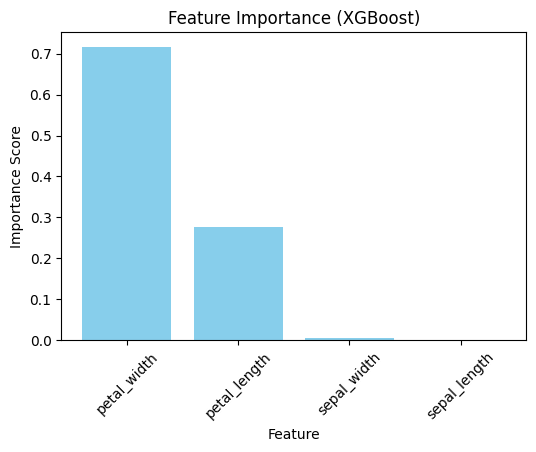

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:19:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


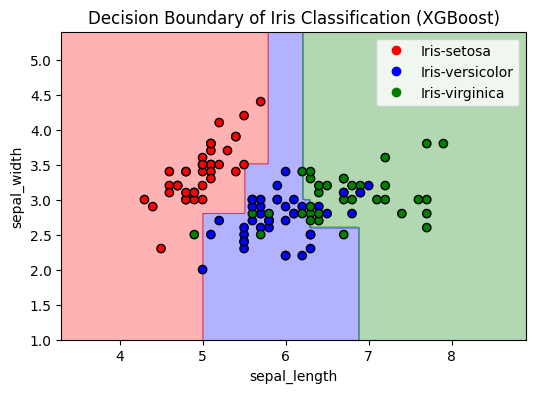

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap

# 🔹 Load your dataset (No conversion)
df = pd.read_csv("/content/IRIS.csv")

# 🔹 Store original species names for legend
species_labels = df["species"].unique()

# 🔹 Split features and labels (Without modifying species column)
X = df.drop("species", axis=1)
y = df["species"]  # Keep species as string labels

# 🔹 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 🔹 Encode labels for XGBoost (Temporary encoding for training)
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# 🔹 Train XGBoost Model with fewer estimators (Fast Execution)
model = xgb.XGBClassifier(n_estimators=10, max_depth=3, learning_rate=0.1, use_label_encoder=False, eval_metric="mlogloss", random_state=42)
model.fit(X_train, y_train_encoded)

# 🔹 Feature Importance Graph
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(6,4))
plt.title("Feature Importance (XGBoost)")
plt.bar(range(X.shape[1]), importances[indices], align="center", color="skyblue")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.show()

# 🔹 Decision Boundary Visualization (Using First 2 Features)
def plot_decision_boundary(X, y, species_labels):
    """ Train a classifier on 2 features and plot the decision boundary """
    y_encoded = le.transform(y)  # Encode labels for model training
    model_2d = xgb.XGBClassifier(n_estimators=10, max_depth=3, learning_rate=0.1, use_label_encoder=False, eval_metric="mlogloss", random_state=42)
    model_2d.fit(X, y_encoded)  # Train on only 2 features

    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    # 🔹 Convert mesh points to DataFrame with correct feature names
    mesh_points = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=X.columns[:2])

    Z = model_2d.predict(mesh_points)  # Predict on 2D mesh
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 4))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('red', 'blue', 'green')))
    scatter = plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_encoded, cmap=ListedColormap(('red', 'blue', 'green')), edgecolor='k')
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.title("Decision Boundary of Iris Classification (XGBoost)")
    plt.legend(handles=scatter.legend_elements()[0], labels=["Iris-setosa", "Iris-versicolor", "Iris-virginica"])
    plt.show()

# Select only first 2 features for visualization
X_train_2D = X_train.iloc[:, :2]
y_train_2D = y_train

# 🔹 Call the function with 2D data
plot_decision_boundary(X_train_2D, y_train_2D, species_labels)


**TASK 2   UNEMPLOYMENT ANALYSIS**

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 267
[LightGBM] [Info] Number of data points in the train set: 5828, number of used features: 2
[LightGBM] [Info] Start training from score 7.966321


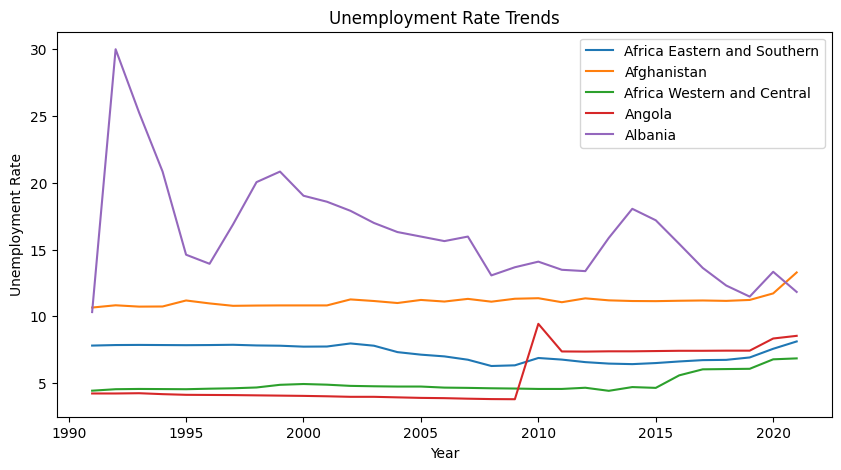

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 🔹 Load dataset
df = pd.read_csv("/content/unemployment analysis.csv")

# 🔹 Preprocess Data
df_melted = df.melt(id_vars=["Country Name", "Country Code"], var_name="Year", value_name="Unemployment Rate")
df_melted["Year"] = df_melted["Year"].astype(int)  # Convert Year to int

# 🔹 Encode categorical features
le = LabelEncoder()
df_melted["Country Code"] = le.fit_transform(df_melted["Country Code"])

# 🔹 Split Data
X = df_melted[["Country Code", "Year"]]
y = df_melted["Unemployment Rate"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Train LightGBM Model
model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)


# 🔹 Line Chart for Unemployment Trend
plt.figure(figsize=(10, 5))
for country in df["Country Name"].unique()[:5]:  # Show first 5 countries
    subset = df_melted[df_melted["Country Name"] == country]
    plt.plot(subset["Year"], subset["Unemployment Rate"], label=country)

plt.xlabel("Year")
plt.ylabel("Unemployment Rate")
plt.title("Unemployment Rate Trends")
plt.legend()
plt.show()



**TASK 3    CAR PRICE PREDICTION**
---



In [13]:
pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.4 MB/s eta 0:00:00


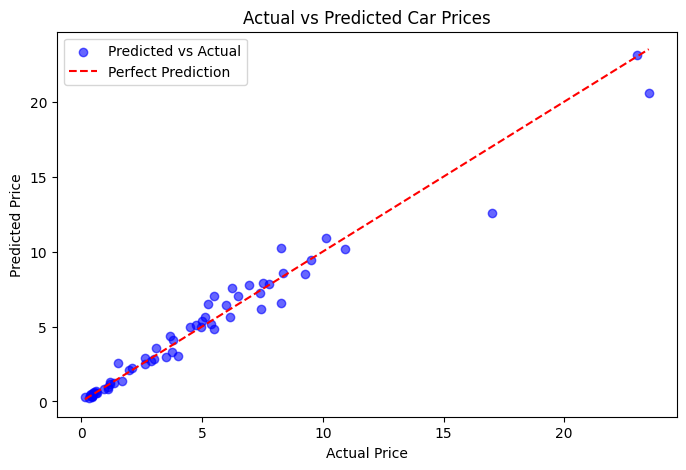

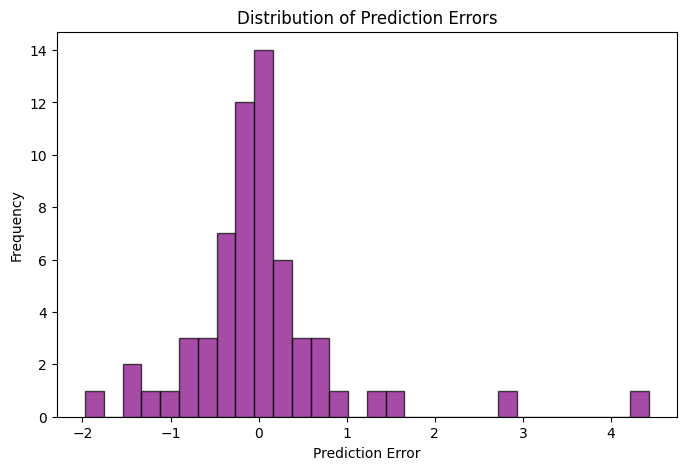

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 🔹 Load dataset
df = pd.read_csv("/content/car_prediction_data.csv")

# 🔹 Encode categorical features
cat_features = ["Fuel_Type", "Seller_Type", "Transmission"]
for col in cat_features:
    df[col] = LabelEncoder().fit_transform(df[col])

# 🔹 Define features & target
X = df.drop(["Car_Name", "Selling_Price"], axis=1)  # Drop irrelevant columns
y = df["Selling_Price"]

# 🔹 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Train CatBoost Model
model = CatBoostRegressor(iterations=500, learning_rate=0.05, depth=6, silent=True, random_state=42)
model.fit(X_train, y_train)

# 🔹 Predict Car Prices
y_pred = model.predict(X_test)

# 🔹 Visualization: Actual vs Predicted Prices
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="red", label="Perfect Prediction")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.legend()
plt.show()

# 🔹 Visualization: Error Distribution
errors = y_test - y_pred
plt.figure(figsize=(8, 5))
plt.hist(errors, bins=30, color='purple', alpha=0.7, edgecolor='black')
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors")
plt.show()


**TASK 4      E-MAIL SPAM DETECTION**

Model Accuracy: 0.957847533632287
              precision    recall  f1-score   support

    Not Spam       0.96      1.00      0.98       965
        Spam       0.97      0.71      0.82       150

    accuracy                           0.96      1115
   macro avg       0.96      0.85      0.90      1115
weighted avg       0.96      0.96      0.95      1115



<ipython-input-17-be250c8e9e8f>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred, palette="viridis")


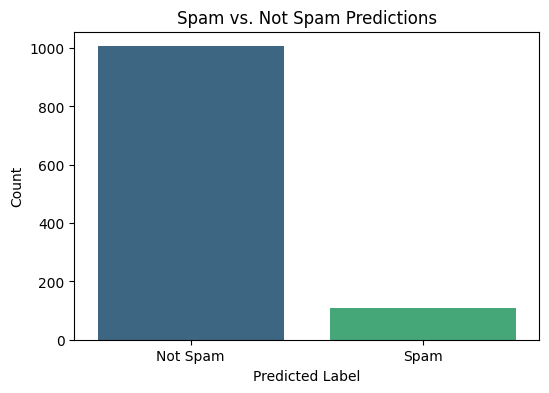

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# 🔹 Load Dataset
df = pd.read_csv("/content/spam.csv", encoding="latin-1")
df = df.iloc[:, :2]  # Keep only first two columns
df.columns = ["label", "text"]  # Rename columns

# 🔹 Convert labels to numeric (spam=1, ham=0)
df["label"] = df["label"].map({"spam": 1, "ham": 0})

# 🔹 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(df["text"], df["label"], test_size=0.2, random_state=42)

# 🔹 Convert Text to TF-IDF Features
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 🔹 Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# 🔹 Make Predictions
y_pred = model.predict(X_test_tfidf)

# 🔹 Model Performance Report
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=["Not Spam", "Spam"]))

# 🔹 Visualization: Spam vs Not Spam Predictions
plt.figure(figsize=(6, 4))
sns.countplot(x=y_pred, palette="viridis")
plt.xticks([0, 1], ["Not Spam", "Spam"])
plt.xlabel("Predicted Label")
plt.ylabel("Count")
plt.title("Spam vs. Not Spam Predictions")
plt.show()


**TASK 5   SALES PREDICTION**

In [18]:
pip install pandas numpy matplotlib seaborn scikit-learn


Mean Absolute Error: 0.7778750000000005
Mean Squared Error: 1.2120307250000026
R² Score: 0.9607771009769878


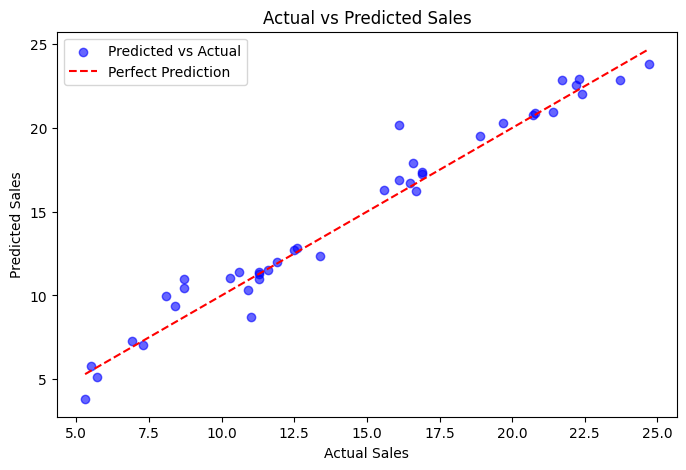

<ipython-input-19-b07b1c7a85a0>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=X.columns, y=model.feature_importances_, palette="viridis")


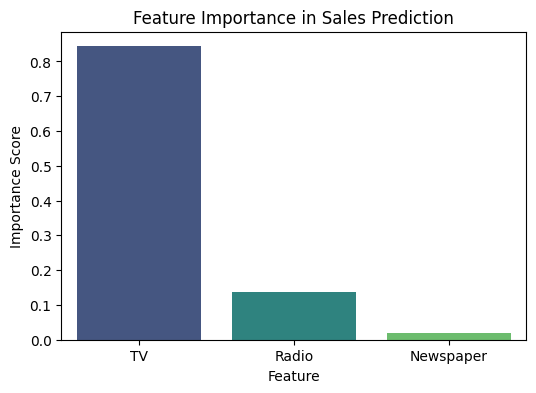

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 🔹 Load dataset
df = pd.read_csv("/content/sales data file.csv")

# 🔹 Define features & target
X = df.drop(["Sales"], axis=1)
y = df["Sales"]

# 🔹 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Train Extra Trees Regressor Model
model = ExtraTreesRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 🔹 Make Predictions
y_pred = model.predict(X_test)

# 🔹 Model Performance Metrics
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# 🔹 Visualization: Actual vs Predicted Sales
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color="blue", alpha=0.6, label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="red", label="Perfect Prediction")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.legend()
plt.show()

# 🔹 Visualization: Feature Importance
plt.figure(figsize=(6, 4))
sns.barplot(x=X.columns, y=model.feature_importances_, palette="viridis")
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Feature Importance in Sales Prediction")
plt.show()
